## Método de Muskingum-Cunge

No método de Muskingum usamos:

$$
Q_{j+1}=C_1 I_{j+1}+C_2 I_j+C_3 Q_j
$$

As equações do Método de Muskingum-Cunge são:

$$
Q_{i+1}^{j+1}=C_1 Q_i^{j+1}+C_2 Q_i^j+C_3 Q_{i+1}^j
$$

sendo:
* $\displaystyle C_1  =\frac{\Delta t-2 K X}{2 K(1-X)+\Delta t}$
* $\displaystyle C_2  =\frac{\Delta t+2 K X}{2 K(1-X)+\Delta t} $
* $\displaystyle C_3  =\frac{2 K(1-X)-\Delta t}{2 K(1-X)+\Delta t}$

Cunge (1969) propôs:

* $\displaystyle K=\frac{\Delta x}{c_k}=\frac{\Delta x}{d Q / d A}$
* $\displaystyle X=\frac{1}{2}\left(1-\frac{Q}{B\, c_k\,  S_o \Delta x}\right)$

### Enunciado

**Exemplo 9.6.1.** Usando os mesmos dados para o canal retangular no **Exemplo 9.4.1** (largura = 200 pés, comprimento = 15.000 pés, inclinação = 1 por cento e n de Manning = 0,035), desenvolva um modelo de onda cinemática linear e propague o hidrograma de afluência dado nas colunas 1 e 2 da Tabela 9.4.1 através do canal usando $\Delta x$ = 3000 pés e $\Delta t$ = 3 min. Não há entrada lateral. A condição inicial é um fluxo uniforme de 2.000 cfs ao longo do canal.




In [23]:
from numpy import zeros, ones, linspace, pi, sin, exp, array
import matplotlib.pyplot as plt
import math

In [24]:
# Grade do tempo
dt = 3. # min
L = 15000.0 # pés
T = 150.0 # min
nt = int(T/dt)

### Cálculo da celeridade da onda cinemática

* Vazão obtida por Manning, vamos aproximar o raio hidráulico $R \approx y$, $S_0 = S_f$, para canal retangular:

$$
\begin{aligned}
Q & =\frac{1.49}{n} S_f^{1 / 2} A R^{2 / 3} \\
& =\frac{1.49}{n} S_o^{1 / 2}(B y) y^{2 / 3}
\end{aligned}
$$

* Estimar profundidade (usando Manning) e área molhada:


$$
\begin{aligned}
y & =\left(\frac{n Q}{1.49 S_o^{1 / 2} B}\right)^{3 / 5} \\
& =\left(\frac{0.035 \times 5000}{1.49 \times 0.01^{1 / 2} \times 200}\right)^{3 / 5} \\
& =2.89 \, \mathrm{pés}
\end{aligned}
$$

* Estimar Velocidade

$$
\begin{aligned}
V & =\frac{Q}{B y} \\
& =\frac{5000}{200 \times 2.89} \\
& =8.65 \mathrm{ft} / \mathrm{s}
\end{aligned}
$$

*  Celeridade da onda cinemática:

$$
\begin{aligned}
c_k & =\frac{1}{B} \frac{d Q}{d y} \\
& =\frac{1}{B} \frac{d}{d y}\left(\frac{1.49 S_o^{1 / 2} B}{n} y^{5 / 3}\right) \\
& =\left(\frac{1.49 S_o^{1 / 2}}{n}\right)\left(\frac{5}{3}\right) y^{2 / 3} \\
& =\frac{1.49 \times 0.01^{1 / 2} \times 5 \times(2.89)^{2 / 3}}{0.035 \times 3} \\
& =14.4 \mathrm{ft} / \mathrm{s}
\end{aligned}
$$

In [25]:
#Q0 = 0.7*6000.0 # cfs
Q = 8.65*200*2.89 # ft^3/s
S0 = 0.01 # adimensional
B = 200 # pés
n = 0.035

ck = 14.4 # ft/s
ck

14.4

Cunge (1969) propôs:

* $\displaystyle K=\frac{\Delta x}{c_k}=\frac{\Delta x}{d Q / d A}$
* $\displaystyle X=\frac{1}{2}\left(1-\frac{Q}{B\, c_k\,  S_o \Delta x}\right)$

### Estimativa do $\Delta x$

$$
\Delta x \leq \frac{c \cdot \Delta t}{2}\left[1+\left(1+1,5 \cdot \frac{Q}{B \cdot S_0 \cdot \Delta t \cdot c^2}\right)^{\frac{1}{2}}\right]
$$

In [26]:
dx = (ck*dt)/(2*(1+1.5*Q/(B*S0*dt*ck**2))**(1/2))
print(dx)

# arredondando para baixo
dx = math.floor(dx) # ft
print(dx)

nx = int(L/dx)
dx, nx

8.147868212608527
8


(8, 1875)

In [27]:
# Parâmetros do método Muskingum-Cunge
K = dx/ck
X = 0.5*(1-Q/(B*ck*S0*dx))

K,X

(0.5555555555555556, -10.350043402777777)

In [28]:
C1 = (dt-2*K*X)/(2*K*(1-X)+dt)
C2 = (dt+2*K*X)/(2*K*(1-X)+dt)
C3 = (2*K*(1-X)-dt)/(2*K*(1-X)+dt)
C1, C2, C3

(0.9288258426445647, -0.5444853929252146, 0.6156595502806499)

In [29]:
C1+C2+C3

1.0

In [30]:
nx, nt

(1875, 50)

In [31]:
# Vazão variando no tempo e no espaço
Q = zeros((nx+1,nt+1),float)
# Vazão afluente
Qa = ones((nt+1),float)*2000

In [32]:
# criando arrays
t = linspace(0.0,T,nt+1)
print(len(t),t)

51 [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123.
 126. 129. 132. 135. 138. 141. 144. 147. 150.]


In [33]:
# preenchendo a vazão na posição zero
for i in range(6,22):
  Qa[i] = Qa[i-1] + 250
  #print(i,Qa[i])

for i in range(22,38):
  Qa[i] = Qa[i-1] - 250
  #print(i,Qa[i])

In [34]:
# Preenchendo para a posição zero
Q[0,:] = Qa

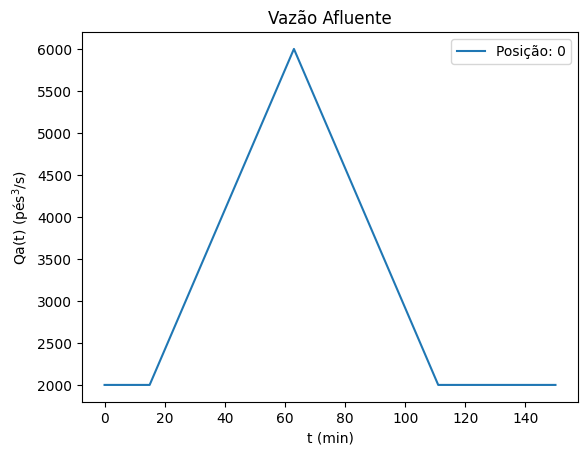

In [35]:
#plt.xlim([0,10])
#plt.ylim([0,2.0])
plt.title('Vazão Afluente')
plt.xlabel('t (min)')
plt.ylabel('Qa(t) (pés$^3$/s)')
plt.plot(t,Q[0,:], label="Posição: 0")
plt.legend(loc='best')
plt.savefig('vazao_afluente.pdf', dpi = 300, bbox_inches='tight')
plt.show();

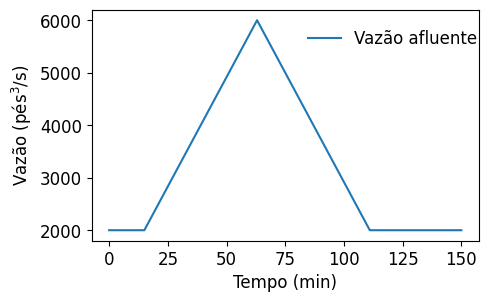

In [36]:
fig, ax = plt.subplots(figsize=(5,3))
ax.tick_params(axis='both', labelsize=12) #increase font size for ticks
plt.ylabel(r'Vazão (pés$^3$/s)', fontsize=12) #y label
plt.xlabel(r'Tempo (min)', fontsize=12) #y label
ax.plot(t,Qa, label='Vazão afluente')
ax.legend()
ax.legend(loc="upper right",bbox_to_anchor=(1.035, 0.98), frameon=False, fontsize=12)
plt.savefig('afluente.pdf', dpi = 300, bbox_inches='tight')
plt.show()

In [37]:
nx

1875

Equação a ser resolvida

$$
Q_{i+1}^{j+1}=C_1 Q_i^{j+1}+C_2 Q_i^j+C_3 Q_{i+1}^j
$$


In [38]:
Q[0,:] = Qa # cfs

In [39]:
# Preenchendo vazão até o tempo j=6
for i in range(nx+1):
  Q[i,0:6] = Q[0,0:6]

In [40]:
for i in range(nx):
  for j in range(len(t)-1):
    Q[i+1,j+1] = C1*Q[i,j+1]+C2*Q[i,j]+C3*Q[i+1,j]
    #print(i,j,Q[i+1,j+1])

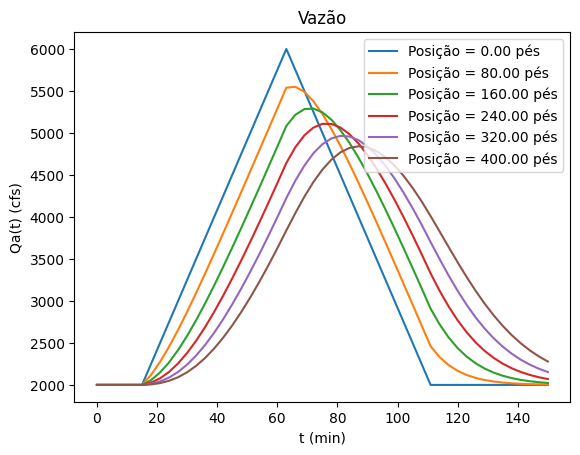

In [41]:
lista = [0,10,20,30,40,50]

plt.title('Vazão')
plt.xlabel('t (min)')
plt.ylabel('Qa(t) (cfs)')
plt.plot(t,Q[lista[0],:], label=f'Posição = {dx*lista[0]:.2f} pés')
plt.plot(t,Q[lista[1],:], label=f'Posição = {dx*lista[1]:.2f} pés')
plt.plot(t,Q[lista[2],:], label=f'Posição = {dx*lista[2]:.2f} pés')
plt.plot(t,Q[lista[3],:], label=f'Posição = {dx*lista[3]:.2f} pés')
plt.plot(t,Q[lista[4],:], label=f'Posição = {dx*lista[4]:.2f} pés')
plt.plot(t,Q[lista[5],:], label=f'Posição = {dx*lista[5]:.2f} pés')
plt.legend(loc='best');

### Conversão de unidades

Caso queiram converter para o SI:

* 1 pé  = 0,3048 metros